Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3591 - loss: 1.7542 - val_accuracy: 0.5553 - val_loss: 1.2357
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5761 - loss: 1.1992 - val_accuracy: 0.6279 - val_loss: 1.0513
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6478 - loss: 1.0026 - val_accuracy: 0.6408 - val_loss: 1.0316
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6845 - loss: 0.8980 - val_accuracy: 0.6835 - val_loss: 0.9196
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7167 - loss: 0.8055 - val_accuracy: 0.6900 - val_loss: 0.9004
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7348 - loss: 0.7517 - val_accuracy: 0.7035 - val_loss: 0.8557
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7557 - loss: 0.6957 - val_accuracy: 0.7104 - val_loss: 0.8533
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7683 - loss: 0.6565 

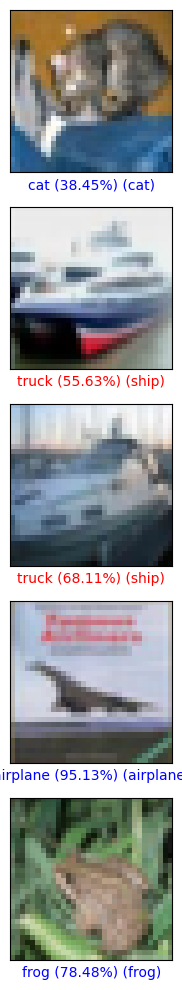

In [22]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Define the CNN architecture
model = models.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Fully connected layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

# Add a softmax layer to convert logits to probabilities
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

# Predict on the test set
predictions = probability_model.predict(test_images)

# Function to plot an image with its predicted and actual label
def plot_image(i, predictions_array, true_labels, images):
    true_label, img = true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{class_names[predicted_label]} ({100 * np.max(predictions_array):.2f}%) ({class_names[true_label[0]]})",
               color=color)

# Plot the first 5 test images with their predicted and actual labels
num_rows = 5
num_cols = 1
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

(-0.5, 258.5, 193.5, -0.5)

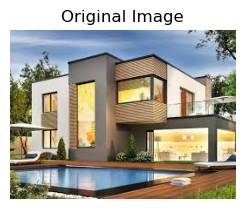

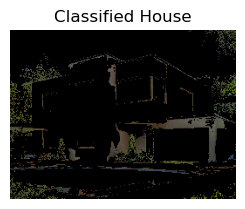